In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("sales (adv).csv",index_col=0)

In [3]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
df.corr()


,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [5]:
dfcor=df.corr()

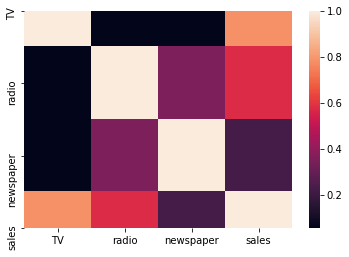

In [6]:
sns.heatmap(dfcor)

In [7]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

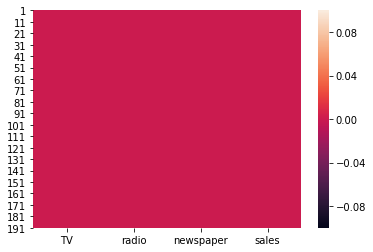

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.shape

(200, 4)

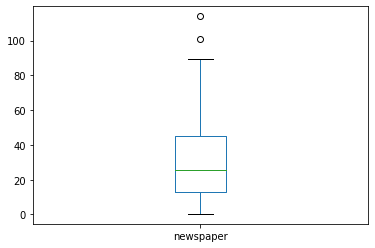

In [10]:
df['newspaper'].plot.box()
#outliers present

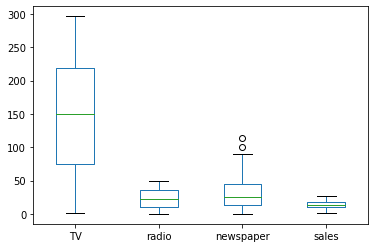

In [11]:
df.plot.box()

In [12]:
#lets remove outliers from newspaper
df.loc[df['newspaper']>85,'newspaper']=np.mean(df['newspaper'])

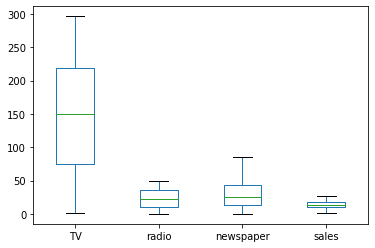

In [13]:
df.plot.box()
#outliers removed

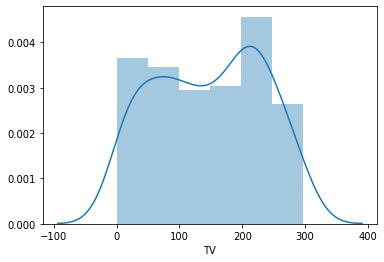

In [14]:
sns.distplot(df['TV'])

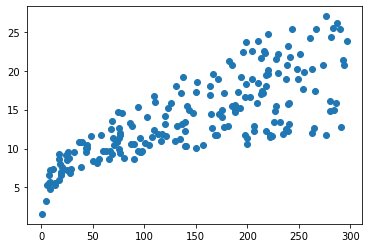

In [15]:
plt.scatter(df['TV'],df['sales'])

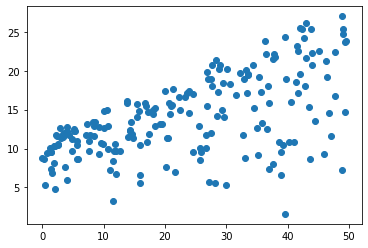

In [16]:
plt.scatter(df['radio'],df['sales'])

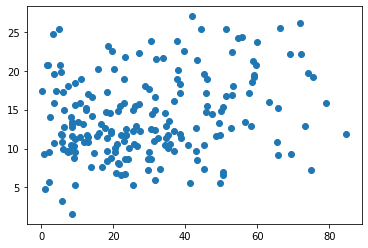

In [17]:
plt.scatter(df['newspaper'],df['sales'])
#newspapers is less correlated with sales

{'bodies': [<matplotlib.collections.PolyCollection at 0x1e5cbf40848>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1e5cbdbd208>,
 'cmins': <matplotlib.collections.LineCollection at 0x1e5cbf489c8>,
 'cbars': <matplotlib.collections.LineCollection at 0x1e5cbf48f08>}

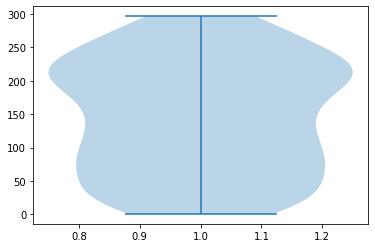

In [18]:
plt.violinplot(df['TV'])

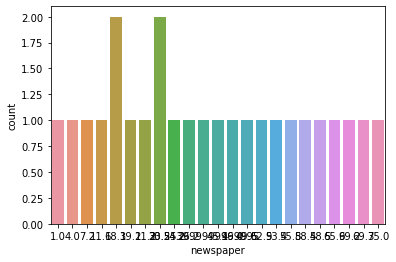

In [19]:
sns.countplot(df['newspaper'][:25])
#countplot of the first 30 rows of column newspaper

In [20]:
df['newspaper'].value_counts()

8.700     3
9.300     3
25.600    3
30.554    3
3.600     2
         ..
49.300    1
31.300    1
44.300    1
75.600    1
58.500    1
Name: newspaper, Length: 170, dtype: int64

In [21]:
df.radio.unique()

array([37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6,  2.1,  2.6,  5.8,
       24. , 35.1,  7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7,  5.1,
       15.9, 16.9, 12.6,  3.5, 29.3, 16.7, 27.1, 16. , 28.3, 17.4,  1.5,
       20. ,  1.4,  4.1, 43.8, 49.4, 26.7, 37.7, 22.3, 33.4,  8.4, 25.7,
       22.5,  9.9, 41.5, 15.8, 11.7,  3.1,  9.6, 41.7, 46.2, 28.8, 28.1,
       19.2, 49.6, 29.5,  2. , 42.7, 15.5, 29.6, 42.8,  9.3, 24.6, 14.5,
       27.5, 43.9, 30.6, 14.3, 33. ,  5.7, 43.7,  1.6, 28.5, 29.9,  7.7,
       20.3, 44.5, 43. , 18.4, 40.6, 25.5, 47.8,  4.9, 33.5, 36.5, 14. ,
       31.6, 21. , 42.3,  4.3, 36.3, 10.1, 17.2, 34.3, 46.4, 11. ,  0.3,
        0.4, 26.9,  8.2, 38. , 15.4, 20.6, 46.8, 35. ,  0.8, 36.9, 26.8,
       21.7,  2.4, 34.6, 32.3, 11.8, 38.9,  0. , 49. , 12. ,  2.9, 27.2,
       38.6, 47. , 39. , 28.9, 25.9, 17. , 35.4, 33.2, 14.8,  1.9,  7.3,
       40.3, 25.8, 13.9, 23.3, 39.7, 21.1, 11.6, 43.5,  1.3, 18.1, 35.8,
       36.8, 14.7,  3.4, 37.6,  5.2, 23.6, 10.6, 20

In [22]:
collist=df.columns.values
ncol=12
nrows=8

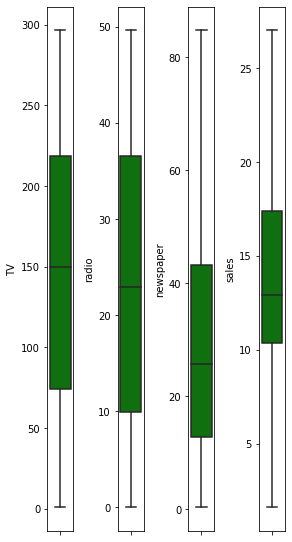

In [23]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

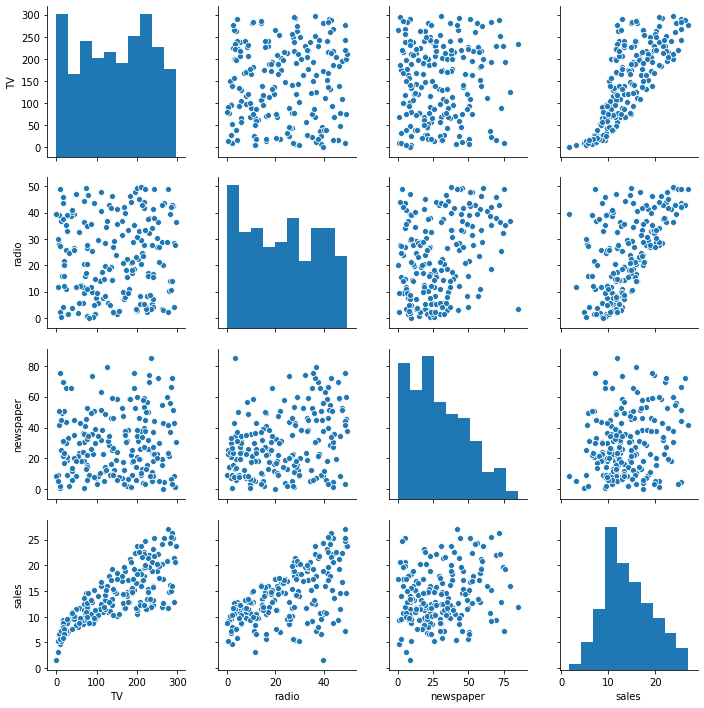

In [24]:
sns.pairplot(df)

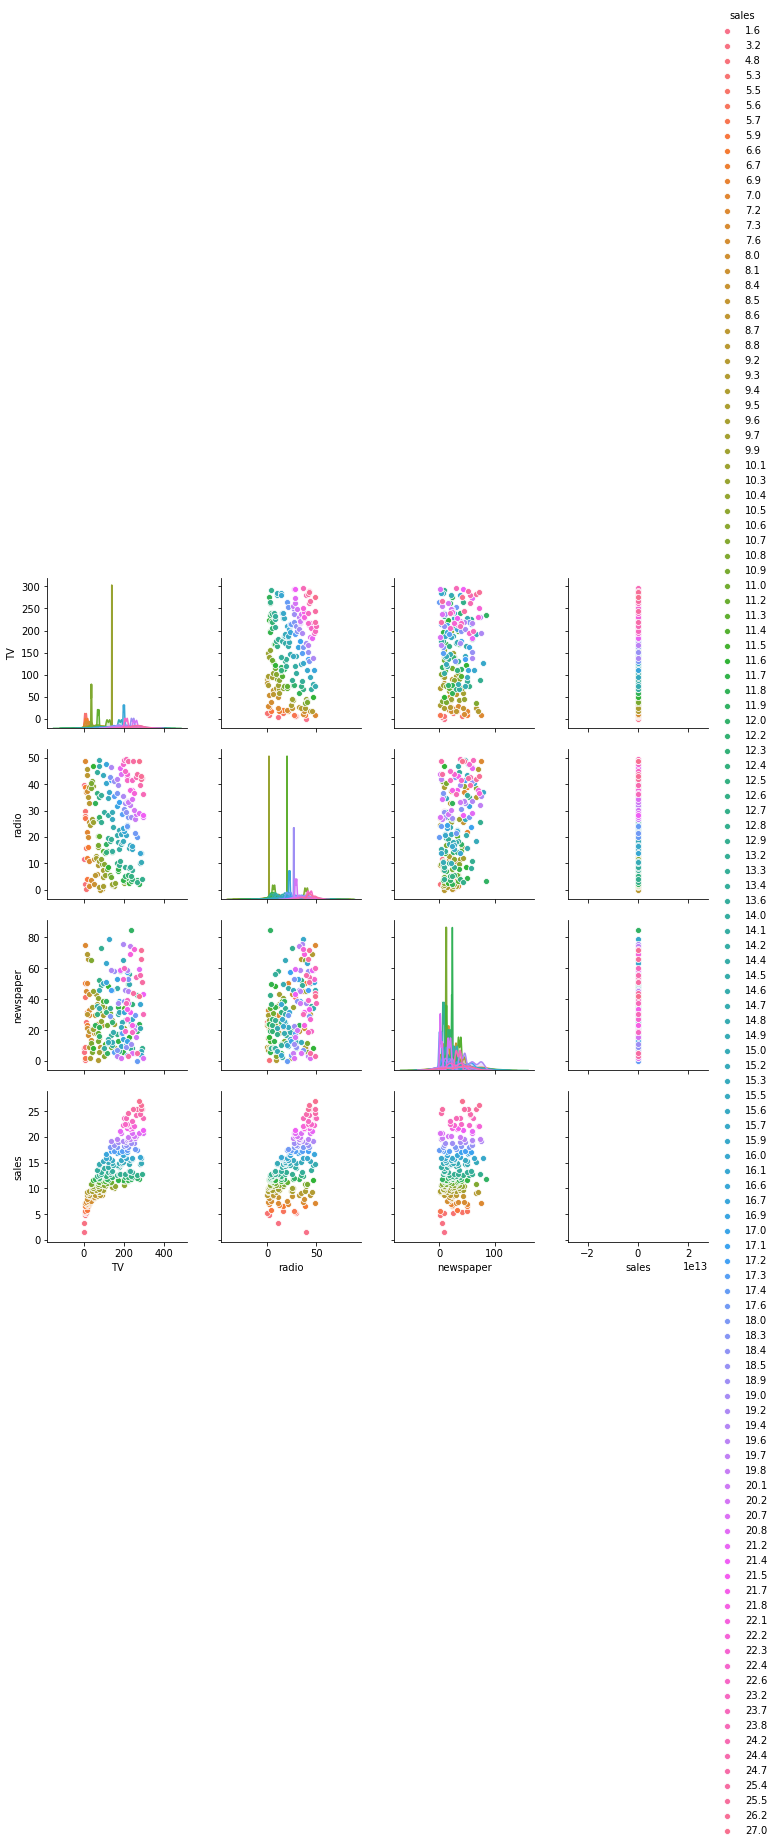

In [25]:
sns.pairplot(df,hue='sales',height=2.5)

In [26]:
columns_target=['sales']
columns_train=['TV','radio','newspaper']
x=df[columns_train]
y=df[columns_target]

In [27]:
lr=LinearRegression()

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=83)

In [29]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lr.score(x_test,y_test)

0.9287521846372231

In [31]:
from sklearn import linear_model
max_r_score=0
for r_state in range(42,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)        

max r2 score corresponding to  151  is  0.9429329133507786


In [32]:
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring="r2")
a_score

array([0.87645753, 0.91813511, 0.92997869, 0.81822265, 0.89529865])

In [33]:
# finalising the model at random_state 151
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=151)

In [34]:
pred=lr.predict(x_test)
print("Predicted sales:",pred)
print("actual sales",y_test)

Predicted sales: [[ 7.35358163]
 [12.04593444]
 [12.41592525]
 [ 9.95937512]
 [10.9410633 ]
 [19.97119115]
 [22.8205222 ]
 [ 4.41217409]
 [ 9.04197017]
 [ 3.66715816]
 [11.99855951]
 [14.61268563]
 [ 6.52887655]
 [15.4784597 ]
 [18.21373837]
 [10.39027772]
 [19.16082466]
 [ 9.80384374]
 [16.97898008]
 [17.13095732]
 [12.58898144]
 [24.01607905]
 [17.01462625]
 [23.12126316]
 [18.37646651]
 [ 8.09782369]
 [18.00769346]
 [ 3.53403115]
 [17.25095115]
 [ 8.79883791]
 [12.60017883]
 [14.40024244]
 [ 9.90758346]
 [12.40177668]
 [18.82253127]
 [19.2528777 ]
 [ 4.43143033]
 [20.20579691]
 [19.83485685]
 [17.02161385]
 [10.73285225]
 [16.24910912]
 [15.06056624]
 [ 9.22799372]]
actual sales      sales
171    8.4
8     13.2
51    11.4
39    10.1
167    8.0
54    21.2
62    24.2
77     6.9
67     9.5
9      4.8
178   11.7
104   14.7
23     5.6
157   15.3
154   19.0
95    11.5
143   20.1
139    9.6
188   17.3
12    17.4
191   10.8
99    25.4
65    18.0
18    24.4
142   19.2
25     9.7
106   19.2
1

In [35]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9422211052592796


In [36]:
lr.score(x_test,y_test)

0.9422211052592796

In [37]:
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring="r2")
a_score

array([0.86892158, 0.85884778, 0.92929462, 0.89054559, 0.93288834,
       0.93065324, 0.76344743, 0.91351246, 0.83677748, 0.92946475])

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test) 

In [40]:
rf.score(x_test,y_test)

0.9784399114221056

In [41]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))


0.8821021293347201


In [42]:
from sklearn.model_selection import GridSearchCV
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x,y)
print(grid)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
1
{'alpha': 1}


In [43]:
#ridge works best and gives a good accuracy
rd=Ridge(alpha=1)
rd.fit(x,y)
print(rd.coef_)
print(rd.score(x_test,y_test))

[[0.04573612 0.18734182 0.00146735]]
0.9449854646114025


In [44]:
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring="r2")
a_score

array([0.86892158, 0.85884778, 0.92929462, 0.89054559, 0.93288834,
       0.93065324, 0.76344743, 0.91351246, 0.83677748, 0.92946475])

In [45]:
from sklearn.externals import joblib
joblib.dump(rf,'rfsales.obj')
rf_from_joblib=joblib.load('rfsales.obj')